# Read the data and rename some parameters
Ref: He et al., 2011, SIMULATING TRANSIENT CLIMATE EVOLUTION OF THE LAST DEGLACIATION WITH CCSM3

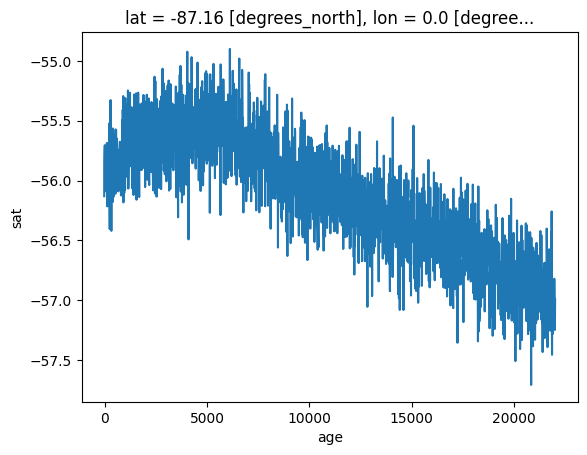

In [1]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/b30.00_4kaDVTj.cam2.ncrcat.ann.nc')

# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000

# convert the sat to degrees C
ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]
ds
# plot a record from the ds_sat at given lat and lon
ds['sat'].isel(lat=0, lon=0).plot()

# The age of LGMR data starts from 100 and ends at 23900 with step of 200 yr. The age of TraCE starts from -29 and ends at 22000, so we resample the TraCE data to match the resolution of LGMR

In [5]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (age: 2204, lat: 48, lon: 96)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * age      (age) float64 2.2e+04 2.199e+04 2.198e+04 ... -10.0 -20.0 -30.0
Data variables:
    sat      (age, lat, lon) float32 -57.14 -57.51 -57.91 ... -24.48 -24.36
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
    Version:                   $Name: ccsm3_0_1_beta22 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sat Oct 26 04:30:38 2013: /glade/apps/opt/nco/...
    nco_openmp_thread_number:  1
    NCO:                       4.2.3>

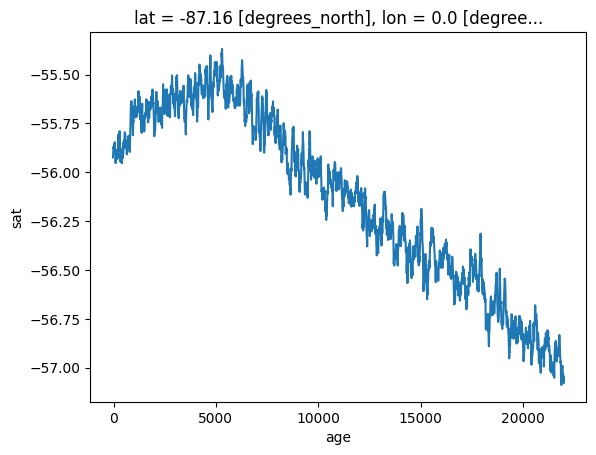

In [100]:
import numpy as np
import xarray as xr

# smoothed_sat = ds['sat'].rolling(age=10, center=True).mean()
smoothed_sat = ds['sat'].rolling(age=10, center=True, min_periods=1).mean()
ds_sat = smoothed_sat.to_dataset(name='sat')
ds_sat['sat'].isel(lat=0, lon=0).plot()

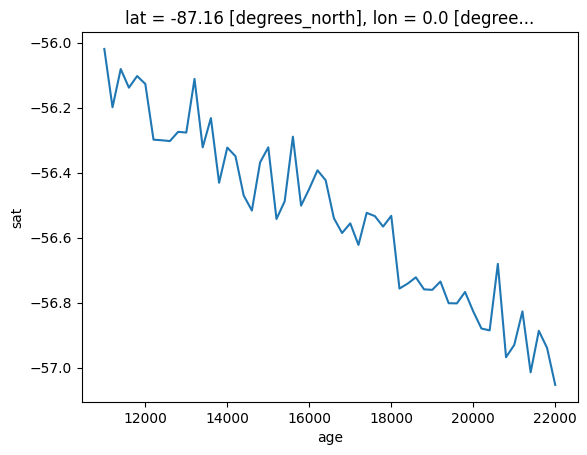

In [2]:
import numpy as np
import xarray as xr

# smoothed_sat = ds['sat'].rolling(age=10, center=True).mean()
smoothed_sat = ds['sat'].rolling(age=10, center=True, min_periods=1).mean()


# Ensure new_age is within the bounds of the original 'age' data
new_age = np.arange(11000, 22001, 200)

# Interpolate the smoothed 'sat' data variable to the new 'age' coordinate
resampled_sat = smoothed_sat.interp(age=new_age)
# resampled_sat=ds['sat'].interp(age=new_age, method='linear')


# Create a new xarray Dataset with the resampled 'sat' data variable
ds_sat = resampled_sat.to_dataset(name='sat')

# ds_sat
# plot a record from the ds_sat at given lat and lon
ds_sat['sat'].isel(lat=0, lon=0).plot()

# Alternative, don't resample data, just crop the data for age>11

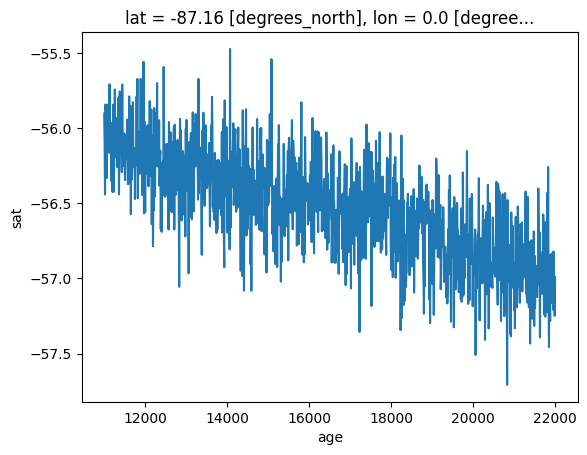

In [4]:
ds_sat=ds
ds_sat = ds_sat.where(ds_sat.age>=11000, drop=True)
ds_sat['sat'].isel(lat=0, lon=0).plot()

# PCA

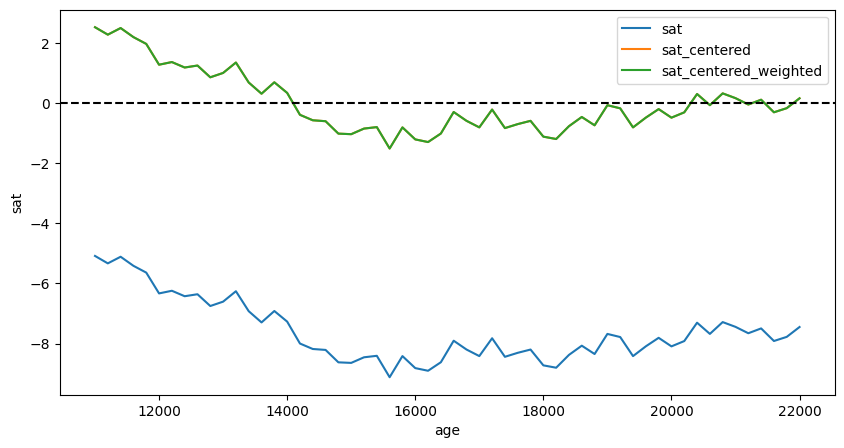

In [3]:
from toolbox import PCA_functions as pf
# 1. Center the Data
ds_sat = pf.center_data(ds_sat)

# 2. Weight the Data
# ds_sat = pf.apply_weighting(ds_sat)

weight = np.cos(np.deg2rad(ds['lat']))
weight = xr.where(weight < 0, 0, weight)
ds_sat['weight'] = weight
ds_sat['sat_centered_weighted'] =ds_sat['sat_centered']

# 3. Plot the Centered and Weighted Data
# Assuming you want to plot data for lat=0 and lon=0
lat_index = 40
lon_index = 90
pf.plot_sat_variables(ds_sat, lat_index, lon_index)


In [4]:
from toolbox import PCA_functions as pf
# 4. Perform PCA
exp_variance, eofs, pcs = pf.sat_PCA(ds_sat)
print('Explained variance:', exp_variance)



shape of the reshaped sat_centered_weighted: (4608, 56)
shape of u, s, vh: (4608, 4608) (56,) (56, 56)
shape of EOFs: (4608, 2)
shape of PCs: (56, 2)
Explained variance: [9.25318143e-01 4.56085718e-02 1.02718997e-02 3.87099840e-03
 2.79869722e-03 2.18334381e-03 1.11809073e-03 1.05309937e-03
 7.29642140e-04 6.22237536e-04 5.89086048e-04 4.95950851e-04
 4.78501020e-04 3.86155178e-04 3.46661782e-04 2.80240216e-04
 2.72087352e-04 2.39858853e-04 2.13480782e-04 1.95576171e-04
 1.89916421e-04 1.79465135e-04 1.75491692e-04 1.61869427e-04
 1.47450701e-04 1.34852411e-04 1.25875767e-04 1.22154998e-04
 1.18751643e-04 1.11385365e-04 1.05724356e-04 9.87194609e-05
 9.64405165e-05 8.78114043e-05 8.30326182e-05 7.96764130e-05
 7.56329646e-05 7.10613246e-05 6.39728996e-05 6.30382275e-05
 5.67298200e-05 5.61870956e-05 5.43526251e-05 5.34453867e-05
 4.88037334e-05 4.65089583e-05 4.23590198e-05 4.13959702e-05
 4.01877421e-05 3.90698787e-05 3.65851492e-05 3.21969428e-05
 3.13736396e-05 2.99049730e-05 2.6253

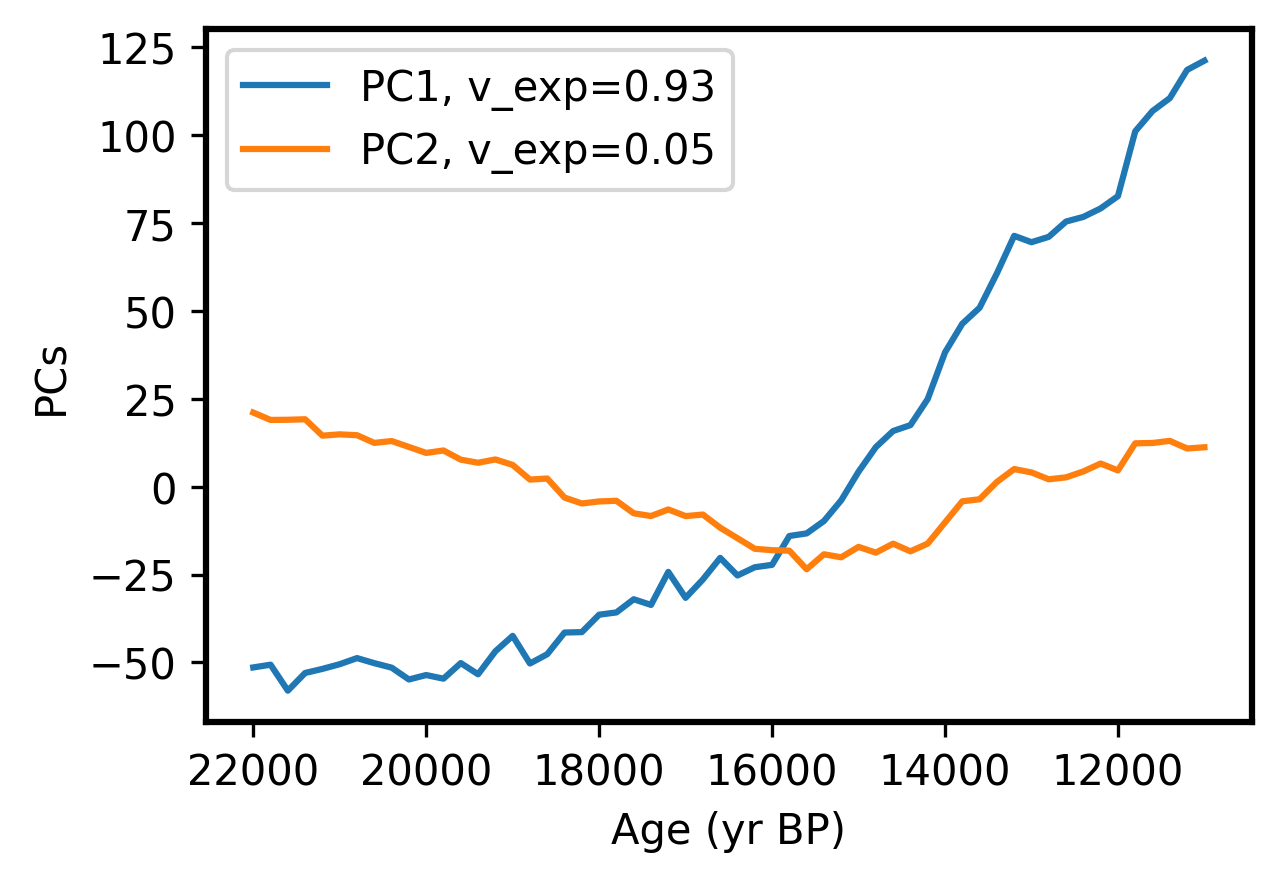

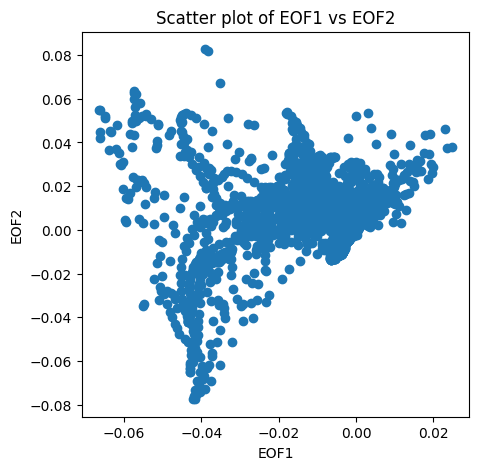

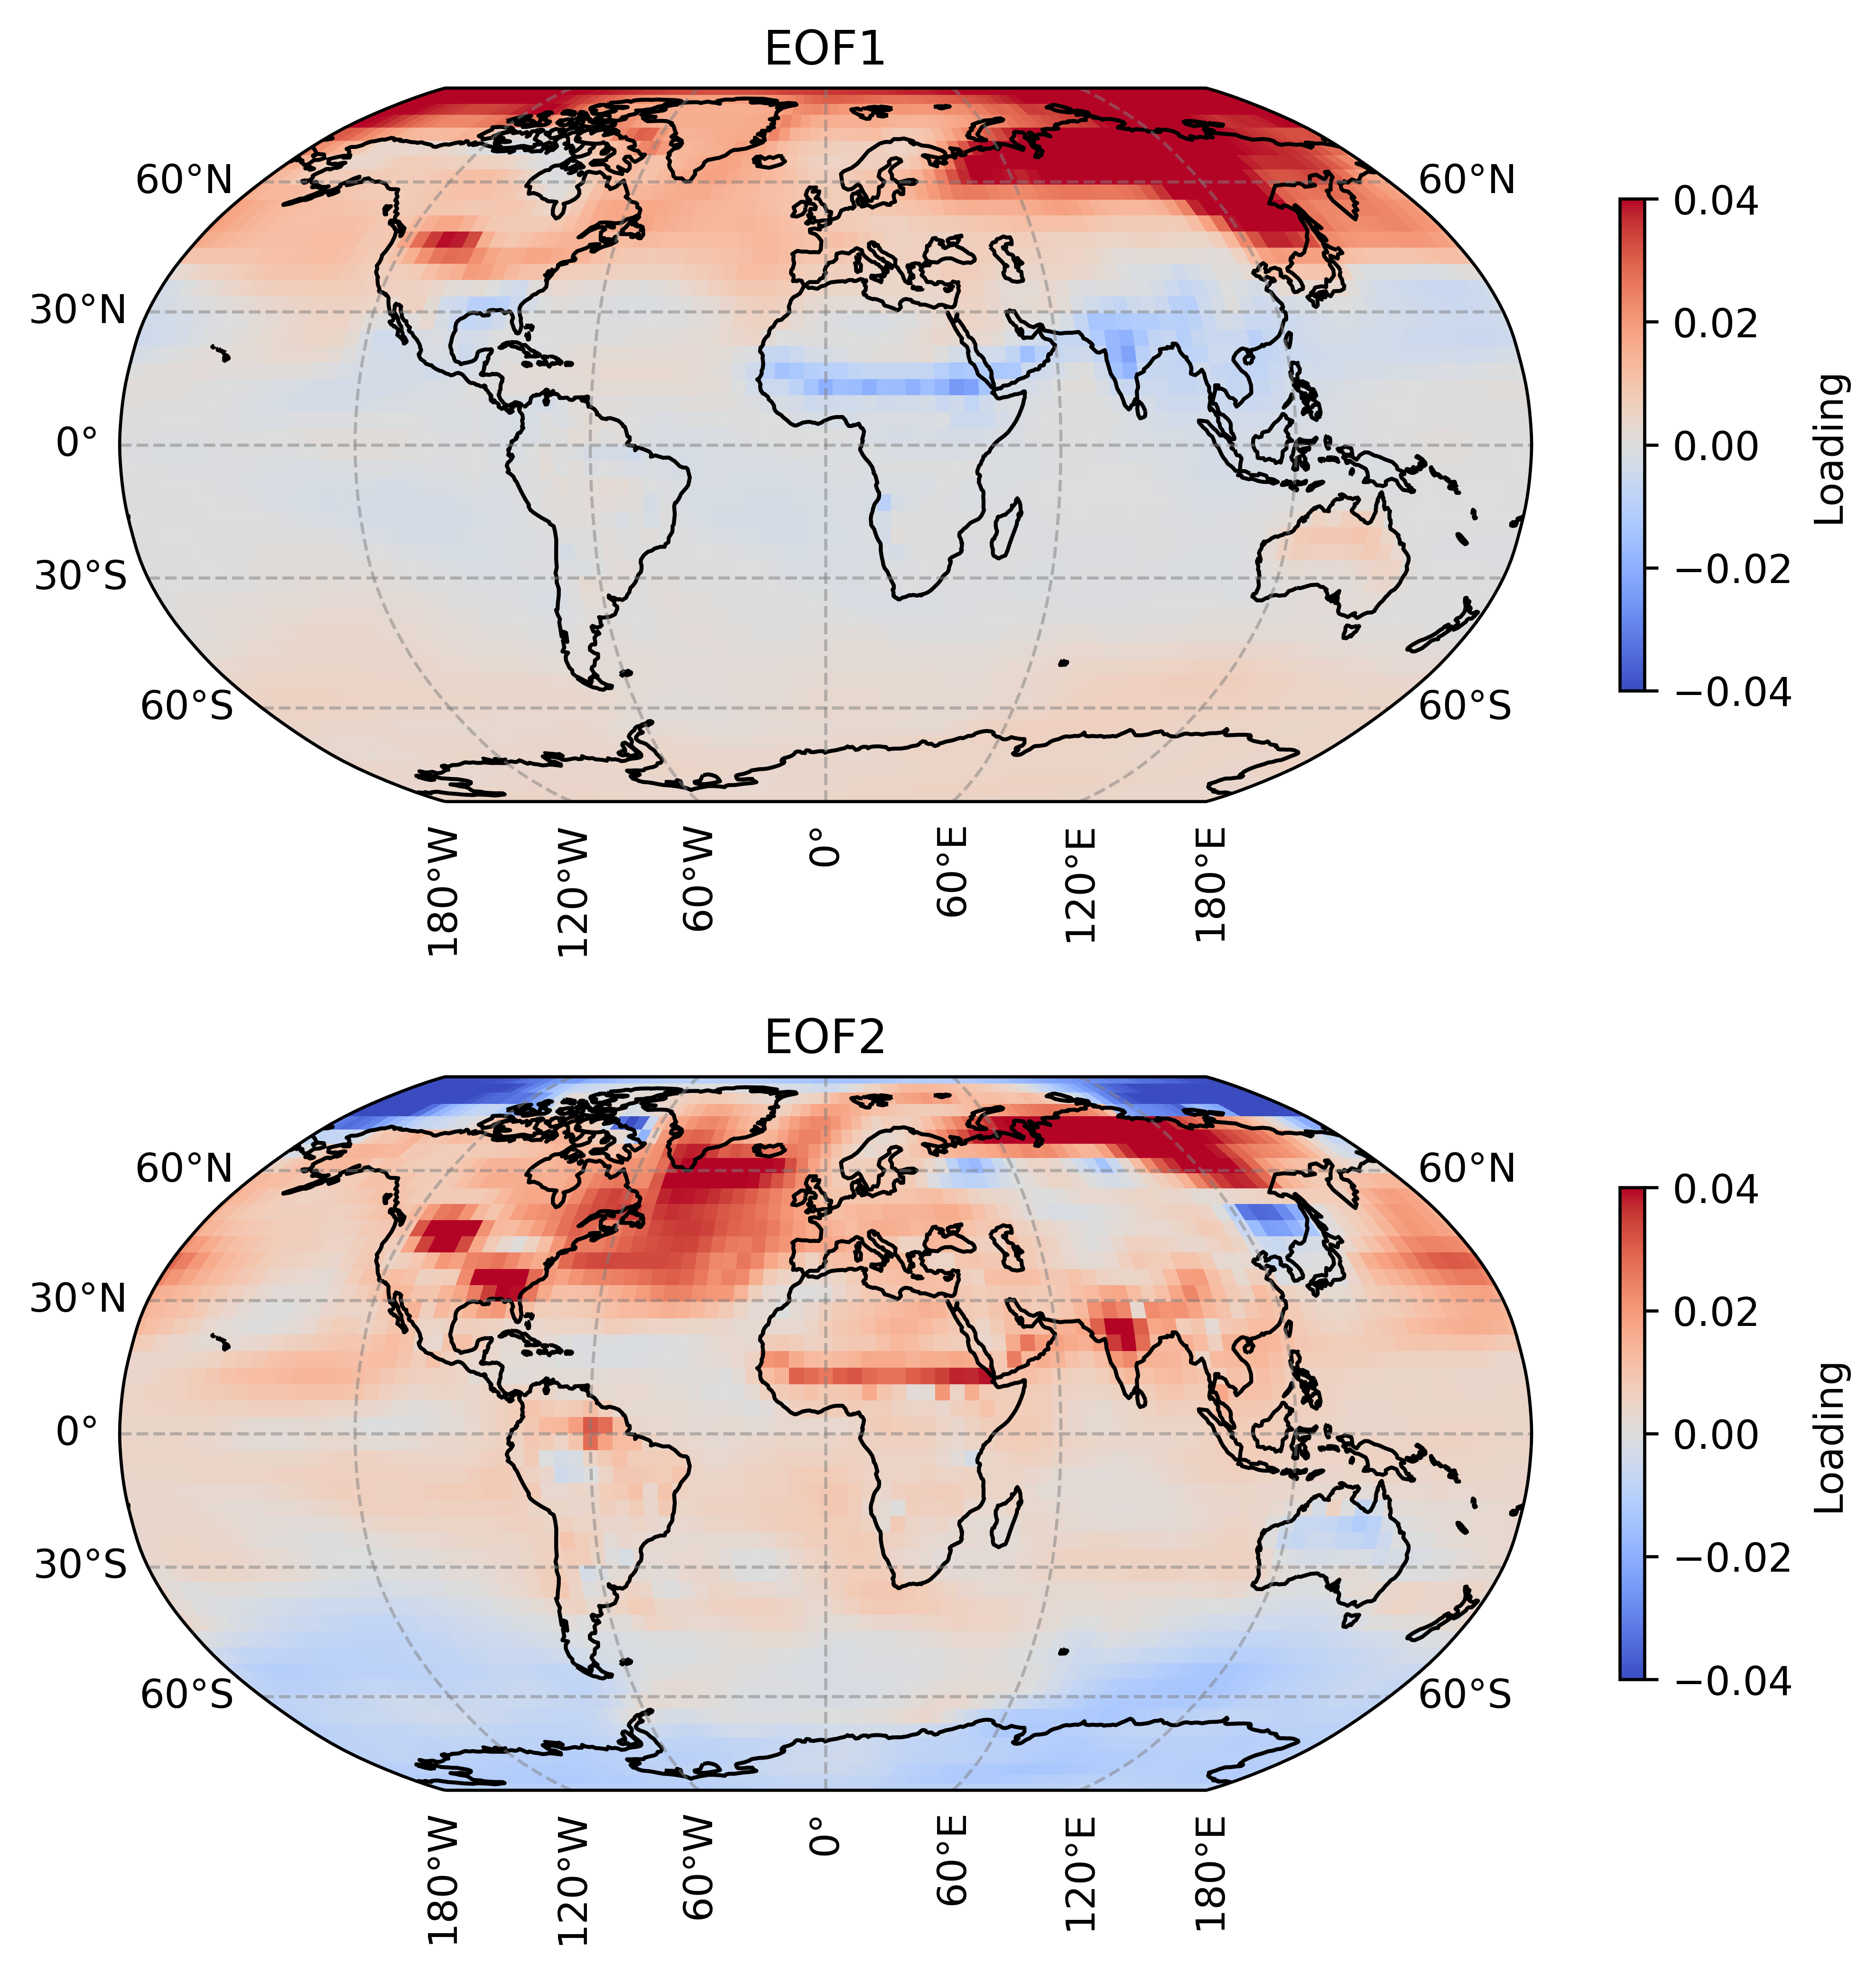

(<Figure size 4800x5400 with 4 Axes>,
 array([<GeoAxesSubplot: title={'center': 'EOF1'}>,
        <GeoAxesSubplot: title={'center': 'EOF2'}>], dtype=object))

In [5]:
# 5. Plot PCs
pf.plot_pcs(ds_sat['age'].values, pcs, exp_variance)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs)

# 7. Plot the EOF Map
pf.plot_eof_map(eofs, ds_sat['lat'].values, ds_sat['lon'].values)

# GMM

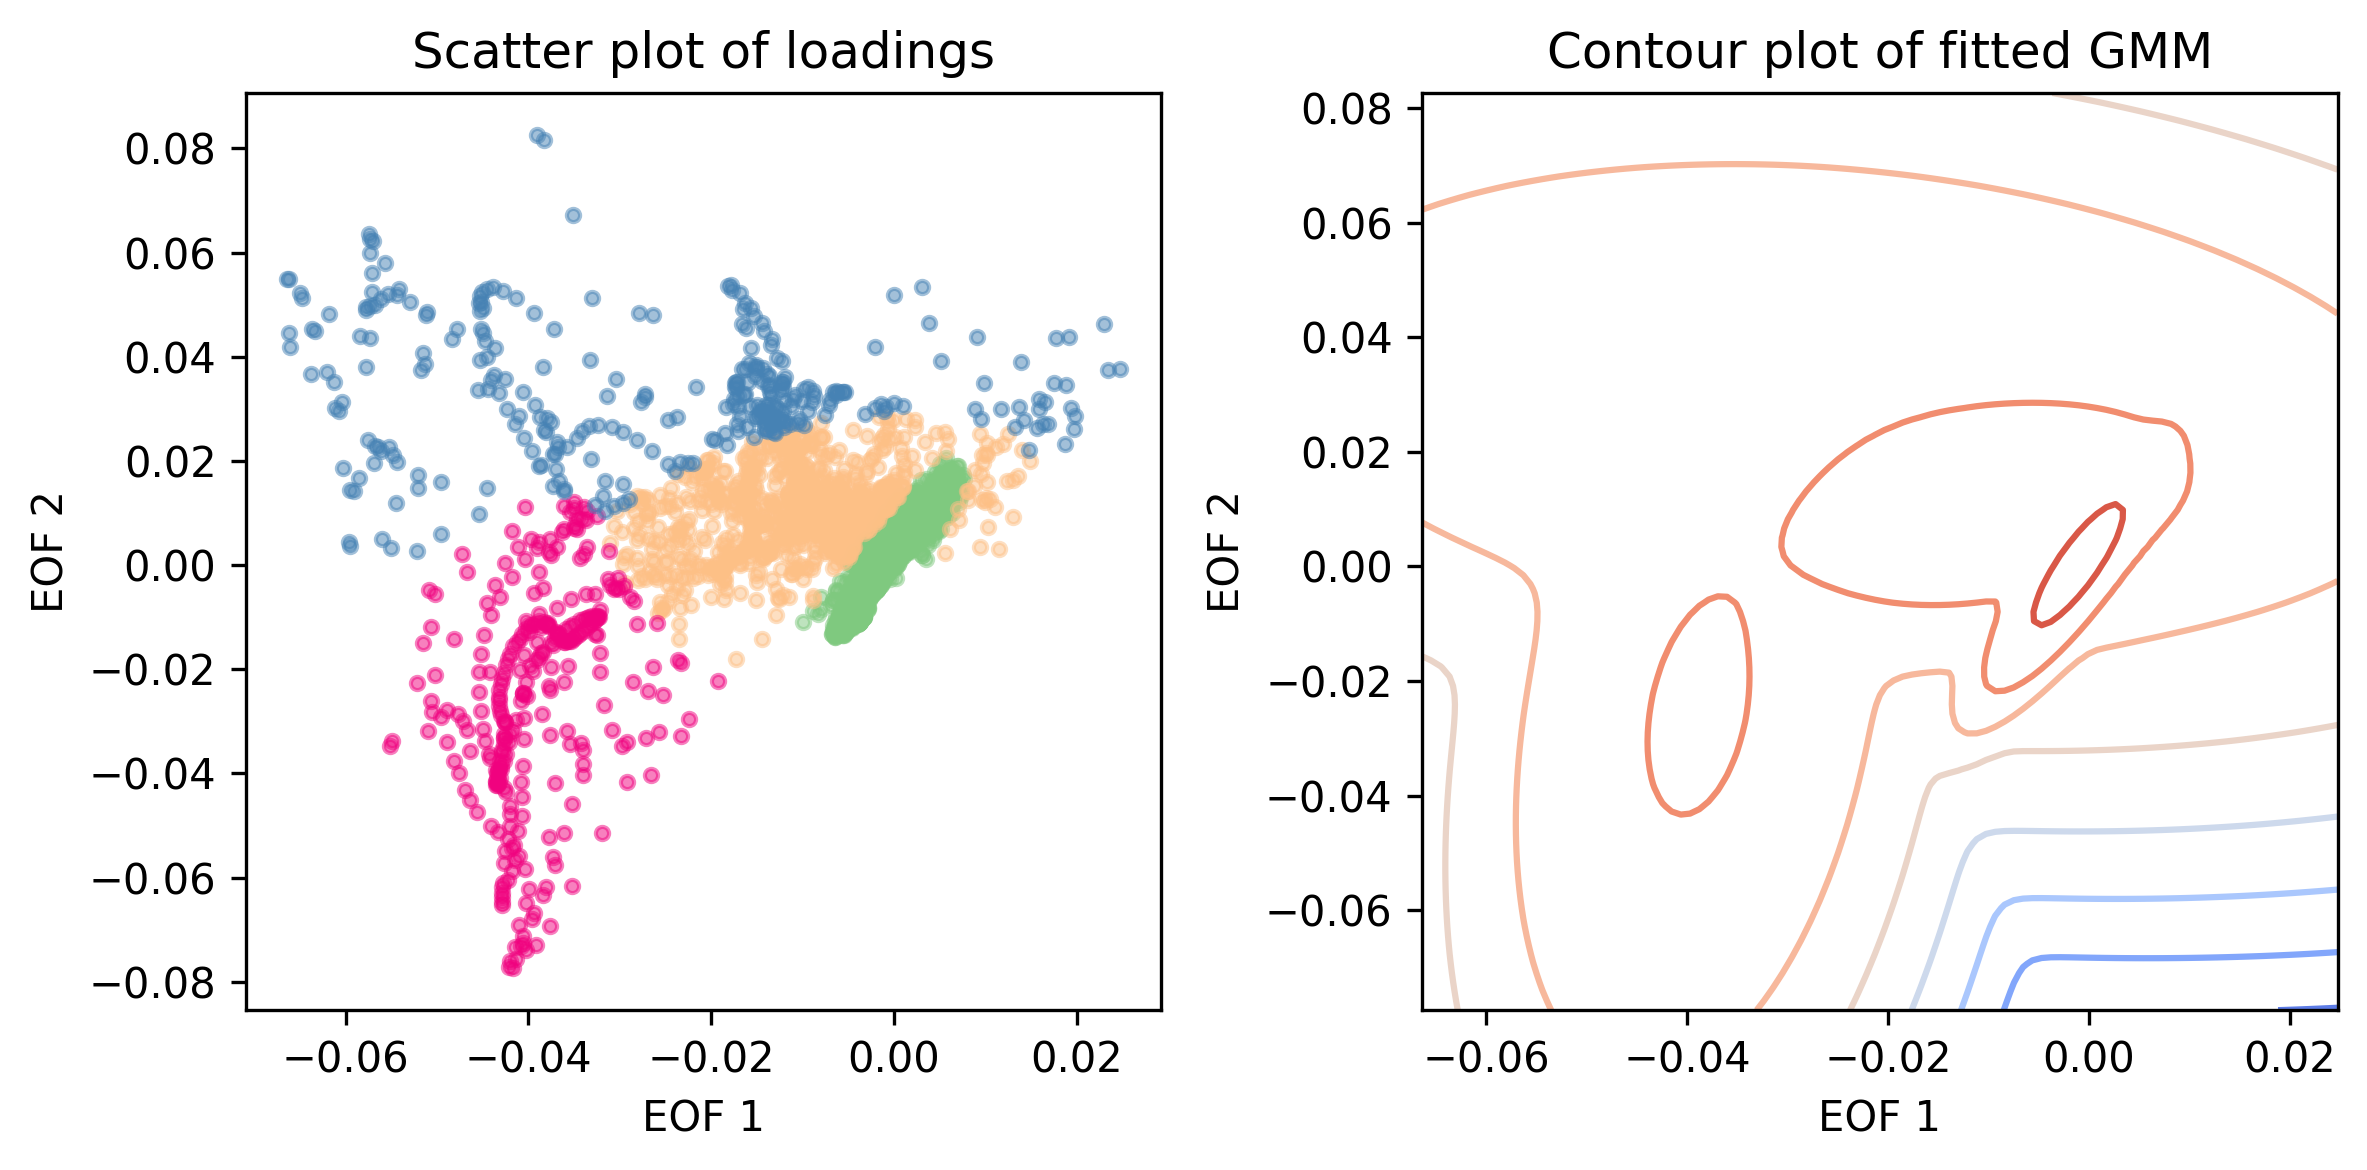

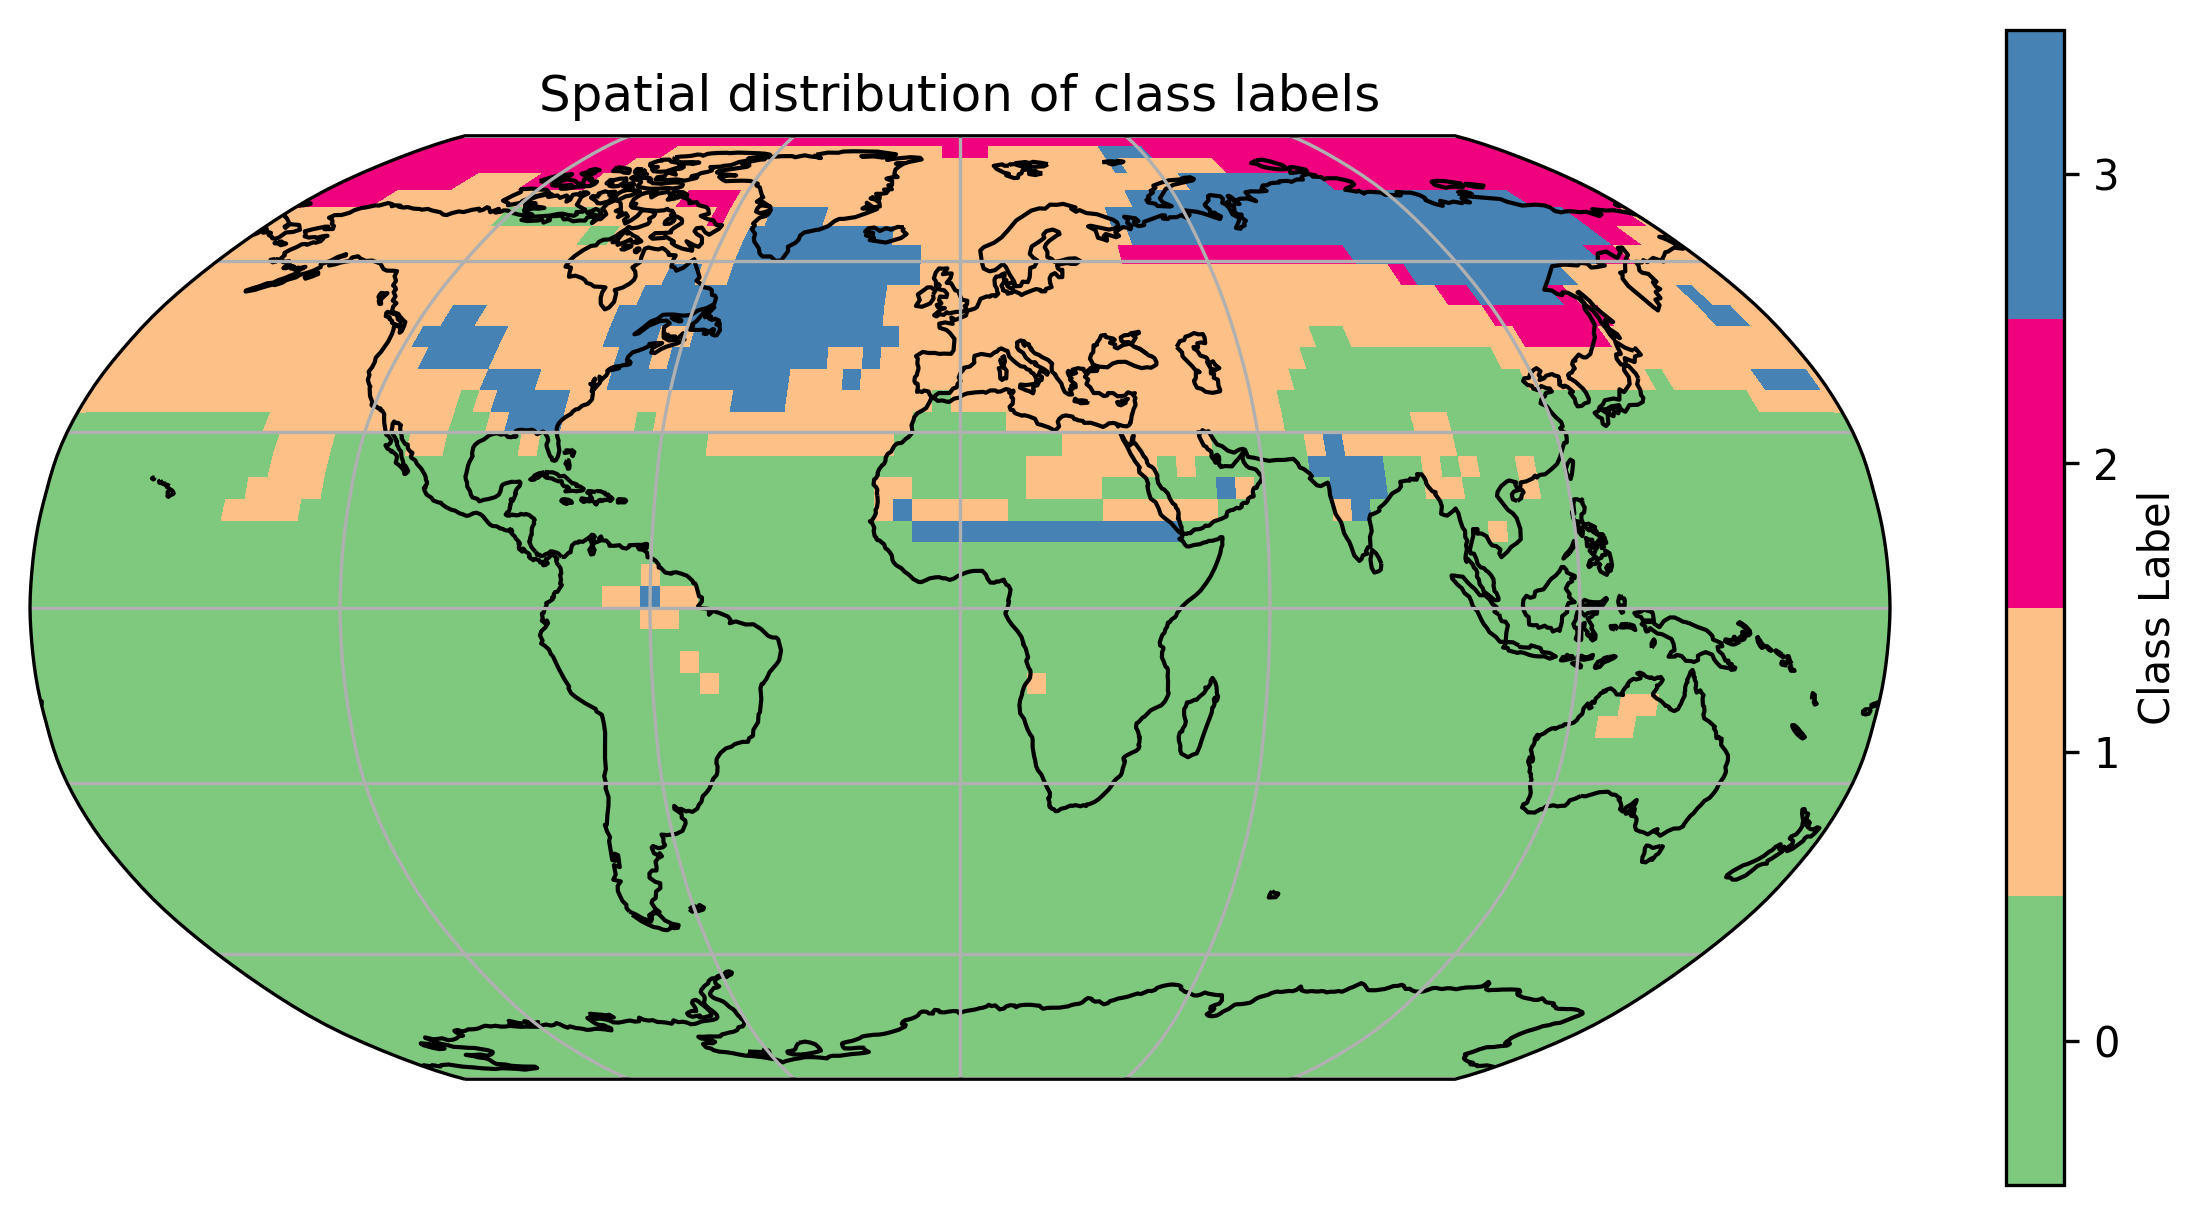

In [9]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

ds_EOFs_GMM,reshaped_probs=gf.GMM4EOFS(eofs, ds_sat,n_components=4)
gf.plot_labels(ds_EOFs_GMM)

In [10]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

uncor_weighted_avg=gf.plot_weighted_average_curve(ds_EOFs_GMM.copy(), dpi=900)